In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('conposcovidloc.csv')

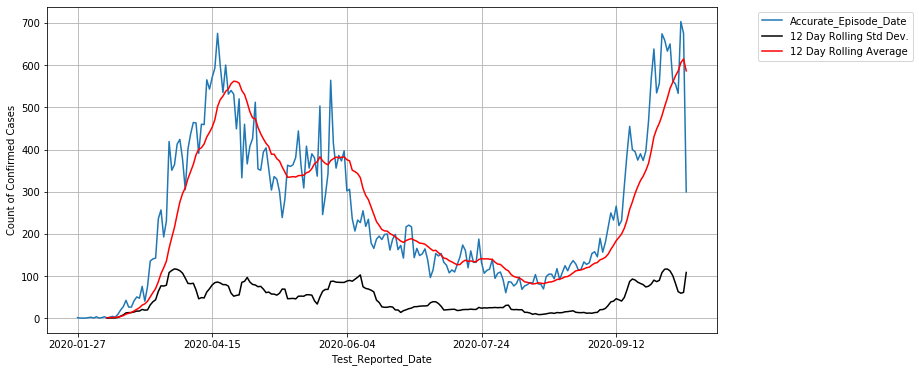

In [4]:
dff = df.groupby(['Test_Reported_Date'])['Accurate_Episode_Date'].count()
dff.plot(figsize=(12,6))
dff_mean = dff.rolling(window=12).mean()
dff_std = dff.rolling(window=12).std()
plt.plot(dff_std, color='black',label='12 Day Rolling Std Dev.')
plt.plot(dff_mean,color='red',label='12 Day Rolling Average')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.30,1))
plt.ylabel('Count of Confirmed Cases')
plt.grid()
plt.show()

In [5]:
cvd = pd.read_csv('covidtesting.csv')
cvd.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cvd.set_index(['Reported Date'],inplace = True)

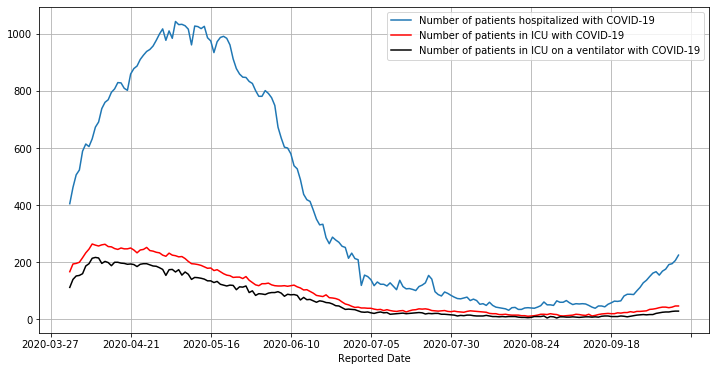

In [7]:
cvd['Number of patients hospitalized with COVID-19'].plot(figsize=(12,6),label = 'Number of patients hospitalized with COVID-19')
cvd['Number of patients in ICU with COVID-19'].plot(color='red', label = 'Number of patients in ICU with COVID-19')
cvd['Number of patients in ICU on a ventilator with COVID-19'].plot(color='black',label='Number of patients in ICU on a ventilator with COVID-19')
plt.grid()
plt.legend()
plt.show()

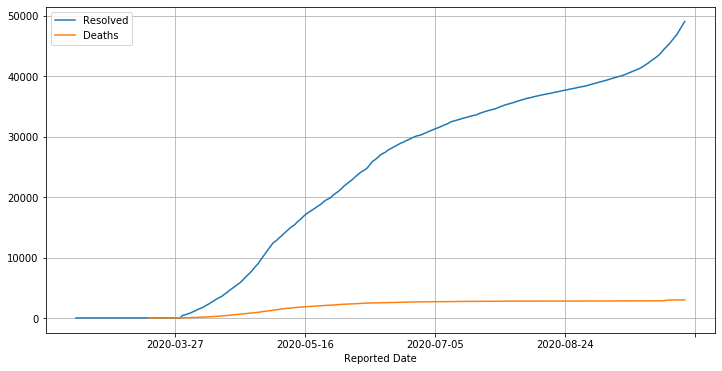

In [8]:
cvd['Resolved'].plot(label='Resolved',figsize=(12,6))
cvd['Deaths'].plot(label='Deaths')
plt.legend()
plt.grid()
plt.show()

In [20]:
cvdd = pd.read_csv('covidtesting.csv', parse_dates=['Reported Date'],index_col=['Reported Date'])
cvdd.head()

,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
Reported Date,,,,,,,,,,,,,,,,,
2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


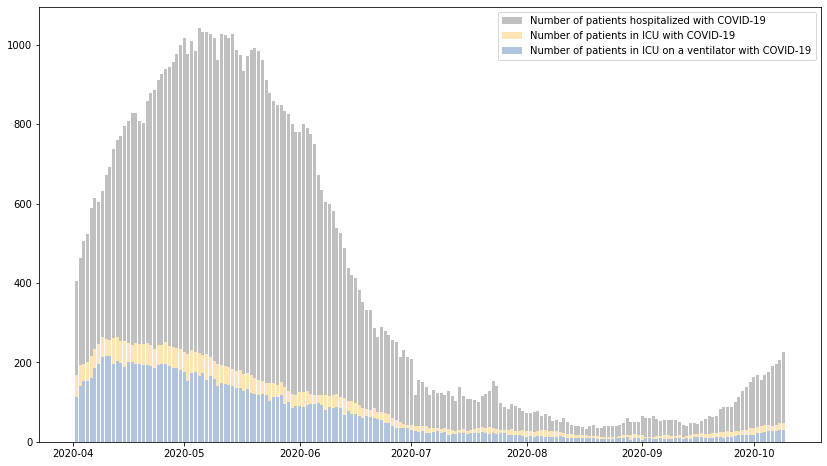

In [21]:
fig, ax = plt.subplots(figsize=(14,8))

ax.bar(cvdd.index.values, cvdd['Number of patients hospitalized with COVID-19'], color='silver', label = 'Number of patients hospitalized with COVID-19')
ax.bar(cvdd.index.values, cvdd['Number of patients in ICU with COVID-19'], color='moccasin', label = 'Number of patients in ICU with COVID-19')
ax.bar(cvdd.index.values, cvdd['Number of patients in ICU on a ventilator with COVID-19'], color='lightsteelblue', label='Number of patients in ICU on a ventilator with COVID-19')

plt.legend()
plt.show()

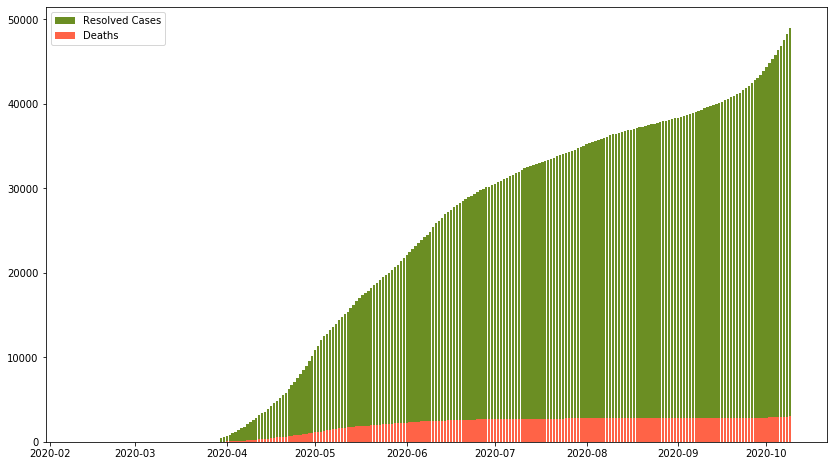

In [22]:
# Resolved, Deaths, Total Cases

fig, ax = plt.subplots(figsize=(14,8))

ax.bar(cvdd.index.values, cvdd['Resolved'], color='olivedrab',label='Resolved Cases')
ax.bar(cvdd.index.values, cvdd['Deaths'], color='tomato',label='Deaths')
#ax.bar(cvdd.index.values, cvdd['Total Cases'], color='slategray',label='Total Cases')

plt.legend(loc = 'upper left')
plt.show()

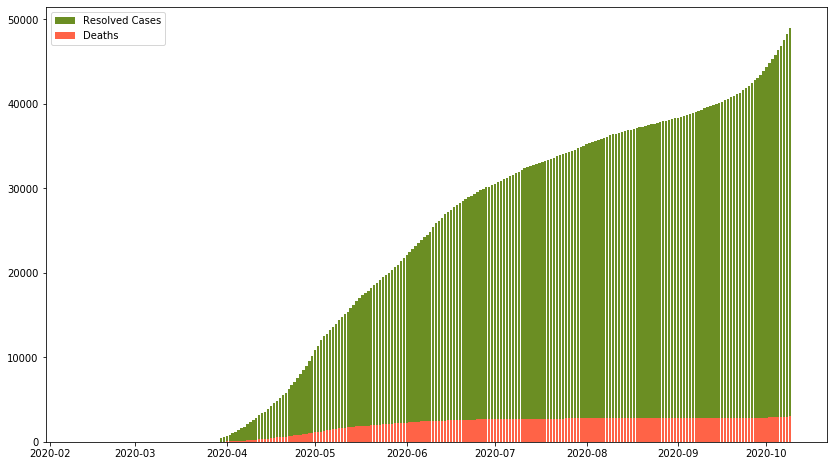

In [23]:
# Resolved, Deaths, Total Cases

fig, ax = plt.subplots(figsize=(14,8))

ax.bar(cvdd.index.values, cvdd['Resolved'], color='olivedrab',label='Resolved Cases')
ax.bar(cvdd.index.values, cvdd['Deaths'], color='tomato',label='Deaths')
#ax.bar(cvdd.index.values, cvdd['Total Cases'], color='slategray',label='Total Cases')

plt.legend(loc = 'upper left')
plt.show()